In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Datos = pd.read_csv('./Titanic-Dataset.csv')
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#se cambian los generos por valores enteros
Datos['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [6]:
# Calcula la moda de la columna "Age"
age_mode = Datos['Age'].mode()[0]

# Rellena los valores nulos en la columna "Age" con la moda
Datos['Age'].fillna(age_mode, inplace=True)


In [7]:
#validamos los cambbios efectuados en las columnas 
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


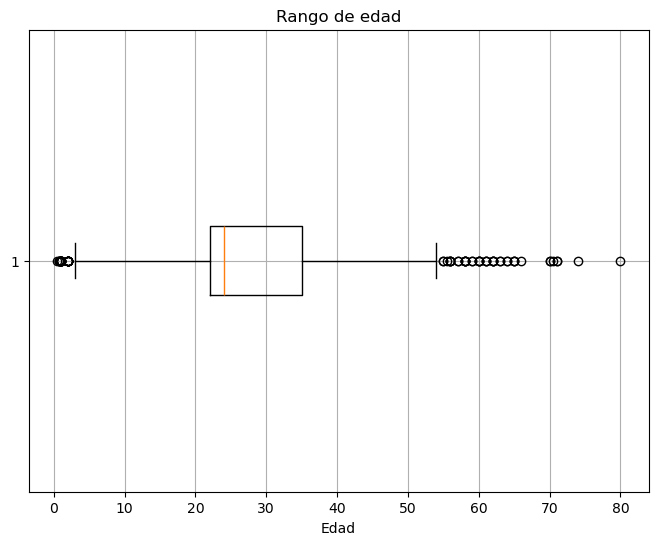

In [8]:
#Identificación de datos en Edad

# Crear el gráfico de caja para la columna 'selling_price'
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.boxplot(Datos['Age'], vert=False)  # Crear el boxplot
plt.xlabel('Edad')  # Etiqueta del eje x
plt.title('Rango de edad')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula

In [9]:
#eliminamos DAtos Atipicos
nivel_minimo=2
nivel_maximo=67
# filtramos los datos atípicos identificados
Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]
# verificamos que los datos atípicos se elimanarn
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [10]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  860 non-null    int64  
 1   Survived     860 non-null    int64  
 2   Pclass       860 non-null    int64  
 3   Name         860 non-null    object 
 4   Sex          860 non-null    int64  
 5   Age          860 non-null    float64
 6   SibSp        860 non-null    int64  
 7   Parch        860 non-null    int64  
 8   Ticket       860 non-null    object 
 9   Fare         860 non-null    float64
 10  Cabin        196 non-null    object 
 11  Embarked     858 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 87.3+ KB


In [11]:
# Elimina las columnas que no son necesarias
columnas_a_eliminar = ['Name', 'Ticket', 'Cabin', 'Embarked']
Datos.drop(columns=columnas_a_eliminar, inplace=True)


In [12]:
Datos.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,445.938372,0.379070,2.306977,0.353488,28.970349,0.493023,0.355814,32.135498
std,256.573916,0.485438,0.837813,0.478331,11.996434,1.072982,0.798078,50.169436
min,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,0.000000,24.250000,0.000000,0.000000,14.054150
75%,667.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.695800
max,891.000000,1.000000,3.000000,1.000000,66.000000,8.000000,6.000000,512.329200


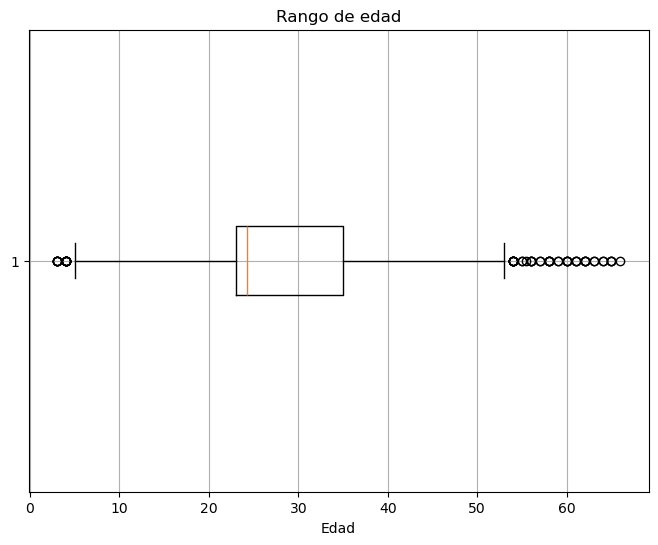

In [13]:
#Identificación de datos en Edad

# Crear el gráfico de caja para la columna 'selling_price'
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.boxplot(Datos['Age'], vert=False)  # Crear el boxplot
plt.xlabel('Edad')  # Etiqueta del eje x
plt.title('Rango de edad')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula

In [14]:
#eliminamos DAtos Atipicos
nivel_minimo=2
nivel_maximo=67
# filtramos los datos atípicos identificados
Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]
# verificamos que los datos atípicos se elimanarn
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [15]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  860 non-null    int64  
 1   Survived     860 non-null    int64  
 2   Pclass       860 non-null    int64  
 3   Sex          860 non-null    int64  
 4   Age          860 non-null    float64
 5   SibSp        860 non-null    int64  
 6   Parch        860 non-null    int64  
 7   Fare         860 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 60.5 KB


In [16]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 3%

# Se crean variables X y Y para almacenar la información del entrenamiento

x = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Survived
y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [17]:
x_train.shape

(602, 7)

In [18]:
x_test.shape

(258, 7)

In [19]:
#Entrenar el modelo configurando los diferentes hiperparámetros
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (x_train , y_train)  

LogisticRegression(solver='liblinear')

In [20]:
# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(x_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [21]:
print (y_test)

38     0
838    1
467    0
670    1
758    0
      ..
278    0
806    0
706    1
587    1
66     1
Name: Survived, Length: 258, dtype: int64


In [22]:
print (Prediccion)

[1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1]


In [23]:
# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
# Desempeño del modelo de regresión

print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       165
           1       0.72      0.72      0.72        93

    accuracy                           0.80       258
   macro avg       0.78      0.78      0.78       258
weighted avg       0.80      0.80      0.80       258



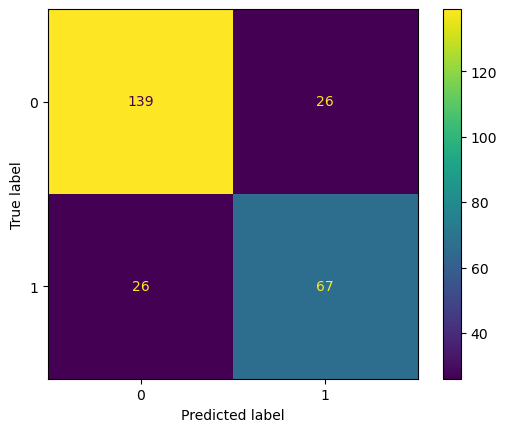

In [24]:
# Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
#Matrix de Confusión del modelo

cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

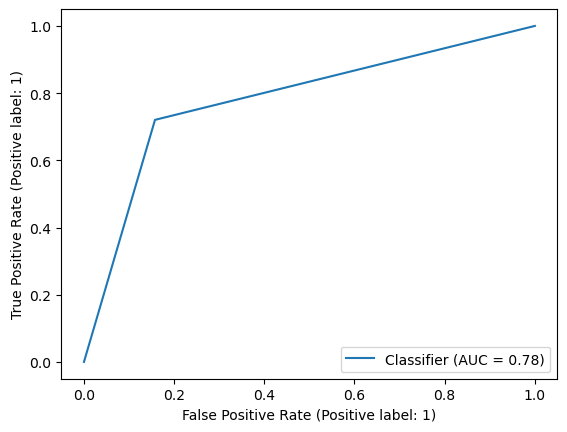

In [25]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()